In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv("C://Users/Satyam Meena/Desktop/Data Science/Data/train.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
data = data.drop(['Ticket','Cabin'], axis=1)

In [6]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
data['Age']=data['Age'].fillna(data['Age'].mean())

In [8]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Fare         891 non-null    float64
 9   Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(3)
memory usage: 69.7+ KB


In [10]:
data=data.dropna()

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Fare         889 non-null    float64
 9   Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(3)
memory usage: 76.4+ KB


In [12]:
new_sex=pd.Categorical(data['Sex'])
new_sex=new_sex.rename_categories([0,1])
data['Sex']=new_sex

In [13]:
data=data.drop(['PassengerId','Name'],axis=1)

In [14]:
data.Sex.value_counts()

1    577
0    312
Name: Sex, dtype: int64

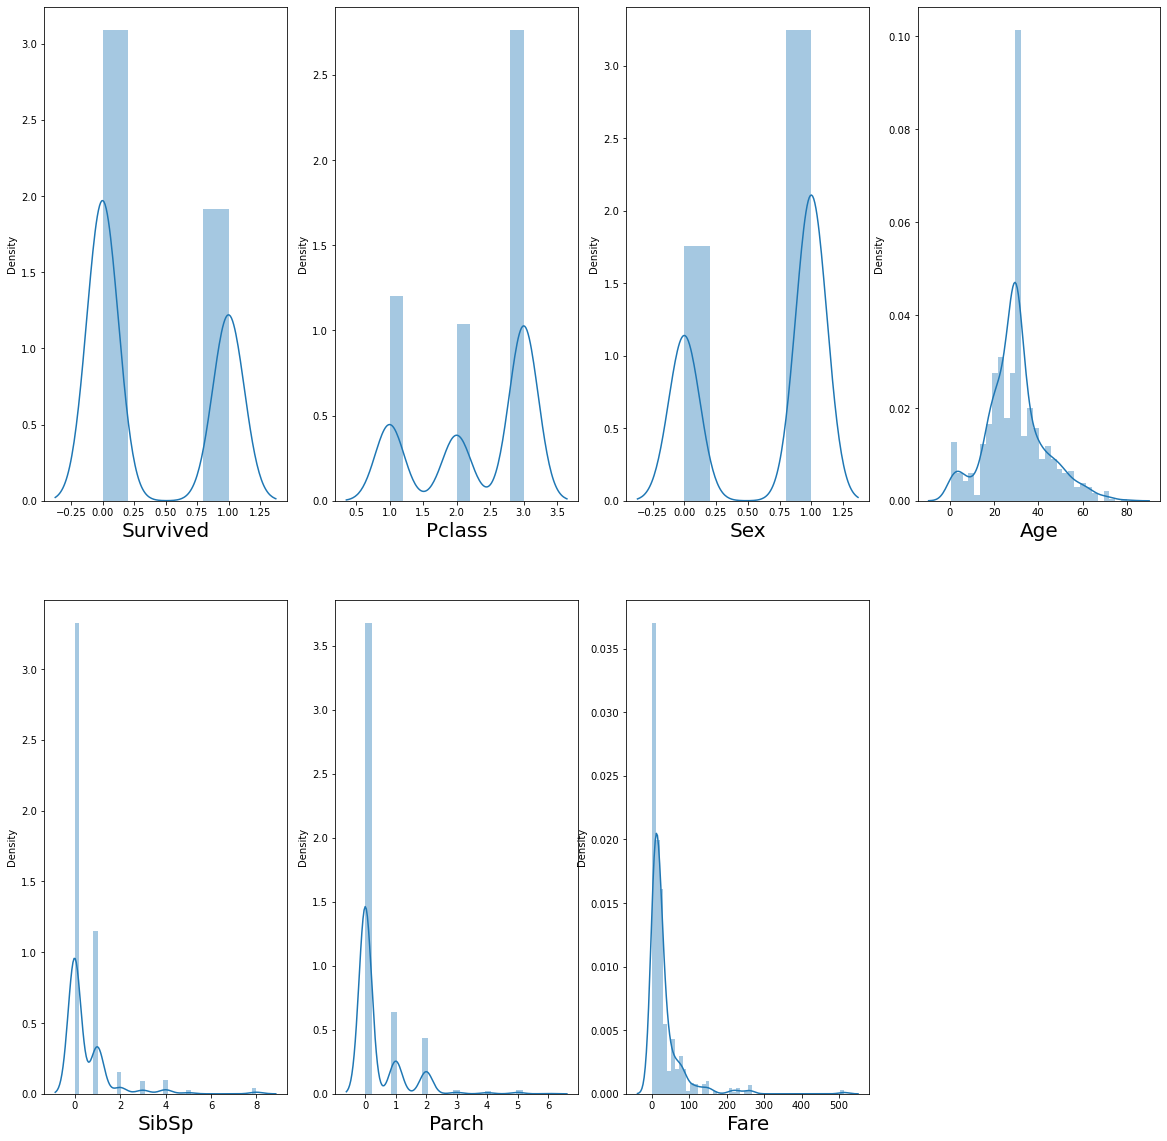

In [15]:
plt.figure(figsize=(20,20),facecolor='w')
plotno=1
for col in data:
    if plotno<=7:
        ax=plt.subplot(2,4,plotno)
        sns.distplot(data[col])
        plt.xlabel(col,fontsize=20)
    plotno+=1
plt.show()

<AxesSubplot:xlabel='Embarked', ylabel='count'>

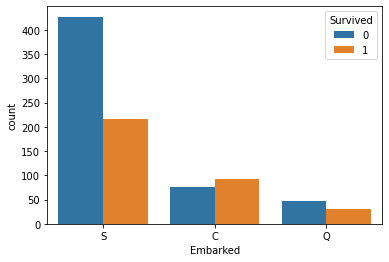

In [16]:
sns.countplot(x="Embarked",hue="Survived",data=data)

<AxesSubplot:xlabel='Sex', ylabel='count'>

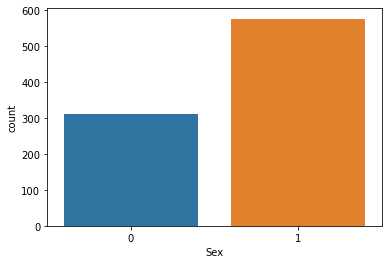

In [17]:
sns.countplot(x="Sex",data=data)

In [18]:
data.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [19]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S
3,1,1,0,35.0,1,0,53.1000,S
4,0,3,1,35.0,0,0,8.0500,S


In [20]:
from sklearn.preprocessing import LabelEncoder
lab_enc=LabelEncoder()
new_Embarked=lab_enc.fit_transform(data['Embarked'])
pd.Series(new_Embarked)
data['Embarked']=new_Embarked
data['Embarked'].unique()

new_sex=lab_enc.fit_transform(data['Sex'])
pd.Series(new_sex)
data['Sex']=new_sex
data['Sex'].unique()

array([1, 0], dtype=int64)

In [21]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


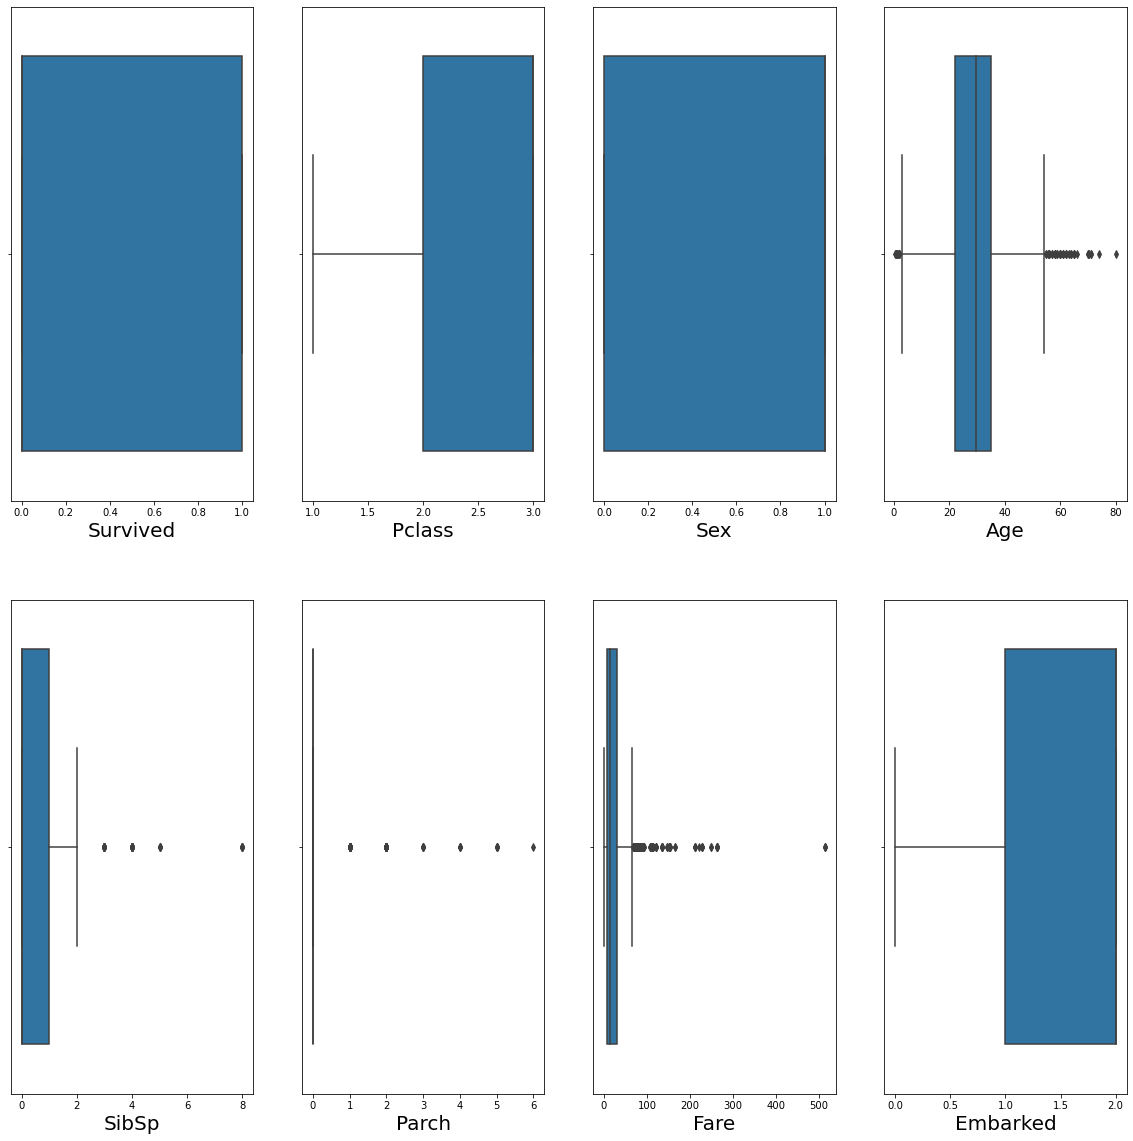

In [22]:
plt.figure(figsize=(20,20),facecolor='w')
plotno=1
for col in data:
    if plotno<=8:
        ax=plt.subplot(2,4,plotno)
        sns.boxplot(data[col],orient='v')
        plt.xlabel(col,fontsize=20)
    plotno+=1
plt.show()

In [23]:
q1=data.quantile(.25)
q3=data.quantile(.75)
iqr=q3-q1
age_high=q3.Age+1.5*iqr.Age
age_low=q1.Age-1.5*iqr.Age
index=np.where((data.Age>age_high)&(data.Age<age_low))

data.drop(data.index[index],inplace=True)
print("Shape:",data.shape)

data.reset_index()


Shape: (889, 8)


,index,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,0,3,1,22.000000,1,0,7.2500,2
1,1,1,1,0,38.000000,1,0,71.2833,0
2,2,1,3,0,26.000000,0,0,7.9250,2
3,3,1,1,0,35.000000,1,0,53.1000,2
4,4,0,3,1,35.000000,0,0,8.0500,2
...,...,...,...,...,...,...,...,...,...
884,886,0,2,1,27.000000,0,0,13.0000,2
885,887,1,1,0,19.000000,0,0,30.0000,2
886,888,0,3,0,29.699118,1,2,23.4500,2
887,889,1,1,1,26.000000,0,0,30.0000,0


In [24]:
high=q3.SibSp+1.5*iqr.SibSp
low=q1.SibSp-1.5*iqr.SibSp
index=np.where((data.SibSp>high)&(data.SibSp<low))

data.drop(data.index[index],inplace=True)
print("Shape:",data.shape)

data.reset_index()

Shape: (889, 8)


,index,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,0,3,1,22.000000,1,0,7.2500,2
1,1,1,1,0,38.000000,1,0,71.2833,0
2,2,1,3,0,26.000000,0,0,7.9250,2
3,3,1,1,0,35.000000,1,0,53.1000,2
4,4,0,3,1,35.000000,0,0,8.0500,2
...,...,...,...,...,...,...,...,...,...
884,886,0,2,1,27.000000,0,0,13.0000,2
885,887,1,1,0,19.000000,0,0,30.0000,2
886,888,0,3,0,29.699118,1,2,23.4500,2
887,889,1,1,1,26.000000,0,0,30.0000,0


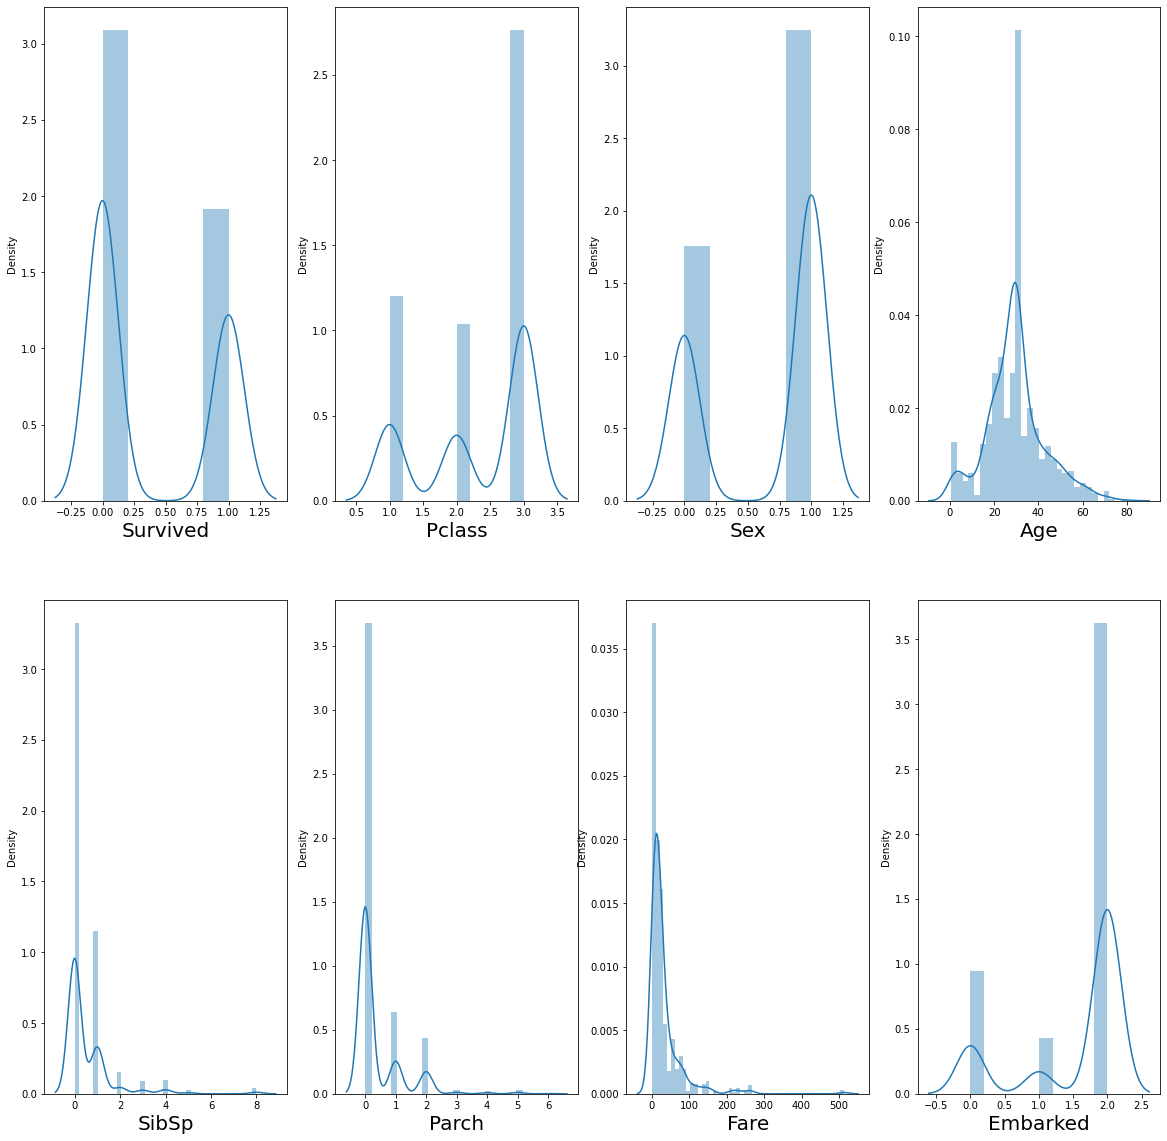

In [25]:
plt.figure(figsize=(20,20),facecolor='w')
plotno=1
for col in data:
    if plotno<=8:
        ax=plt.subplot(2,4,plotno)
        sns.distplot(data[col])
        plt.xlabel(col,fontsize=20)
    plotno+=1
plt.show()

In [26]:
X=data.drop(columns='Survived')
Y=data['Survived']

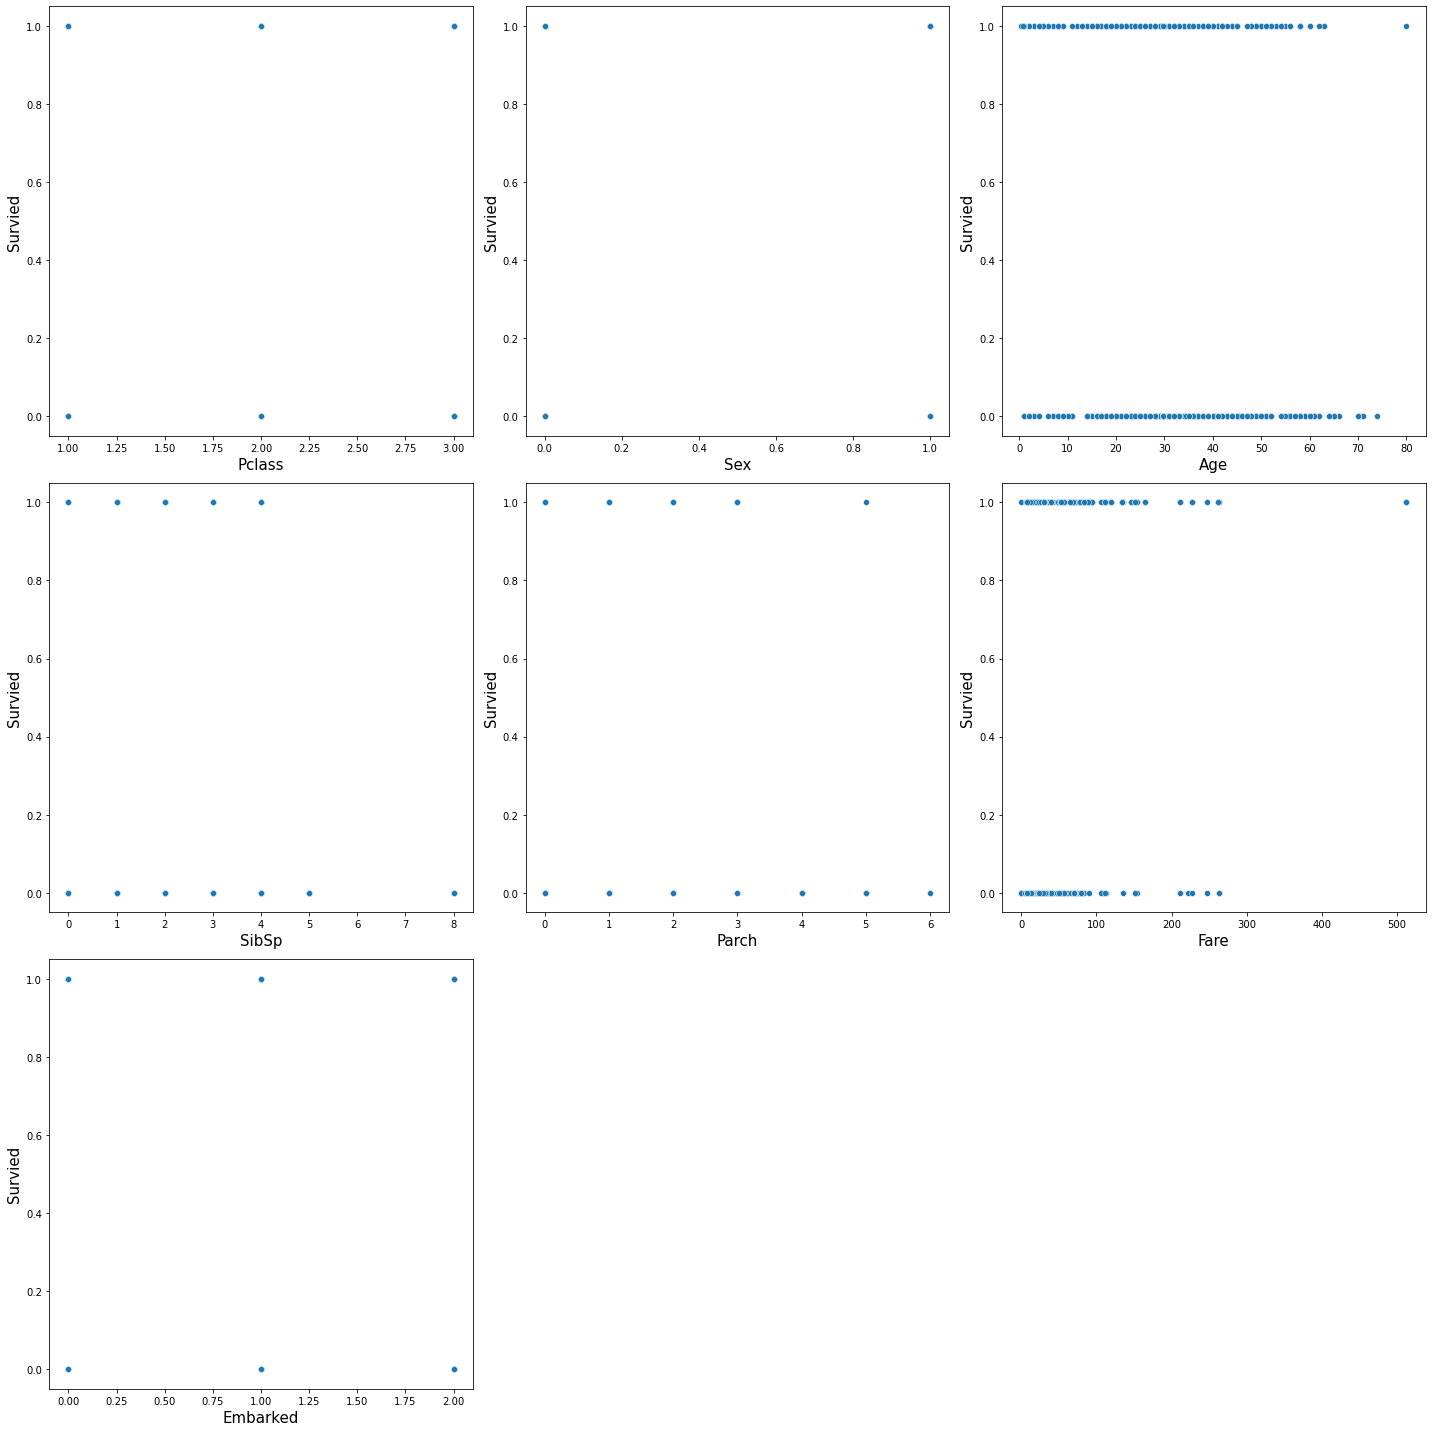

In [27]:
plotno=1
plt.figure(figsize=(20,20))
for col in X:
    if plotno<8:
        plt.subplot(3,3,plotno)
        sns.scatterplot(X[col],Y)
        plt.xlabel(col,fontsize=15)
        plt.ylabel("Survied",fontsize=15)
    plotno+=1
plt.tight_layout()

In [28]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=.2,random_state=10)

In [29]:
lr=LogisticRegression()

In [30]:
lr.fit(X_train,y_train)

LogisticRegression()

In [31]:
y_predict_test=lr.predict(X_test)

In [32]:
from sklearn.metrics import confusion_matrix , accuracy_score
cm = confusion_matrix(y_test, y_predict_test)
accuracy_score(y_test, y_predict_test)

0.8202247191011236

In [33]:
test=pd.read_csv("C://Users/Satyam Meena/Desktop/Data Science/Data/test.csv")

In [34]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [35]:
test = test.drop(['Ticket','Cabin'], axis=1)


In [36]:
test['Age']=test['Age'].fillna(test['Age'].mean())


In [37]:
test['Fare']=test['Fare'].fillna(test['Fare'].mean())

In [38]:
PassengerId=test['PassengerId']

In [39]:
test=test.drop(['PassengerId','Name'],axis=1)

In [40]:
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


In [41]:
from sklearn.preprocessing import LabelEncoder
lab_enc=LabelEncoder()
new_Embarked=lab_enc.fit_transform(test['Embarked'])
pd.Series(new_Embarked)
test['Embarked']=new_Embarked
test['Embarked'].unique()

new_sex=lab_enc.fit_transform(test['Sex'])
pd.Series(new_sex)
test['Sex']=new_sex
test['Sex'].unique()

array([1, 0])

In [42]:
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,7.8292,1
1,3,0,47.0,1,0,7.0000,2
2,2,1,62.0,0,0,9.6875,1
3,3,1,27.0,0,0,8.6625,2
4,3,0,22.0,1,1,12.2875,2


In [43]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    int32  
 2   Age       418 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      418 non-null    float64
 6   Embarked  418 non-null    int32  
dtypes: float64(2), int32(2), int64(3)
memory usage: 19.7 KB


In [44]:
Survived=lr.predict(test)

In [45]:
my_submission = pd.DataFrame({'PassengerId': PassengerId, 'Survived': Survived})
# you could use any filename. We choose submission here
my_submission.to_csv('submission.csv', index=False)

In [46]:
my_submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
